In [2]:
from utils import file_utils
from pipelines.generic_pipline import clean_data_and_transform
from utils.aggregator import Aggregator
import pandas as pd

agg = Aggregator()



In [3]:
#
#	clustering of cmc dataset
#

dataset_filename = 'cmc.arff'

class_column_name = 'class'
numeric_columns = ['wage', 'children']
columns_ordinal = ['weducation', 'heducation', 'wreligion', 'wworking', 'living_index', 'media_exposure']
columns_one_hot = ['hoccupation']

In [4]:
# 1. load file
raw_data = file_utils.load_arff(f'datasets/{dataset_filename}')
data_y = pd.DataFrame(raw_data[class_column_name].apply(lambda bts: int(bts)))

In [5]:
# 2. clean data
clean_data = clean_data_and_transform(raw_data, numeric_columns, columns_ordinal, columns_one_hot)

In [6]:
# 3. evaluate algorithms
n_iter = 5
agg.evaluate(clean_data, n_iter)


manually_selected_k = {
    'k_means': 3,
    'k_medoids_fast': 3,
    'fuzzy_c_means': 3
}

2021-10-31 19:16:23.371920
No. cluster 2 and iteration 0
2021-10-31 19:17:05.403098
No. cluster 2 and iteration 1
2021-10-31 19:17:47.351622
No. cluster 2 and iteration 2
2021-10-31 19:18:29.303547
No. cluster 2 and iteration 3
2021-10-31 19:19:11.359541
No. cluster 2 and iteration 4
2021-10-31 19:19:53.799258
No. cluster 3 and iteration 0
2021-10-31 19:20:18.174388
No. cluster 3 and iteration 1
2021-10-31 19:20:43.602307
No. cluster 3 and iteration 2
2021-10-31 19:21:11.977841
No. cluster 3 and iteration 3
2021-10-31 19:21:37.994797
No. cluster 3 and iteration 4
2021-10-31 19:22:01.331609
No. cluster 4 and iteration 0
2021-10-31 19:22:39.969622
No. cluster 4 and iteration 1
2021-10-31 19:23:13.257690
No. cluster 4 and iteration 2
2021-10-31 19:23:42.814546
No. cluster 4 and iteration 3
2021-10-31 19:24:14.113711
No. cluster 4 and iteration 4
2021-10-31 19:24:44.166687
No. cluster 5 and iteration 0
2021-10-31 19:25:23.710999
No. cluster 5 and iteration 1
2021-10-31 19:26:01.311709
No. 

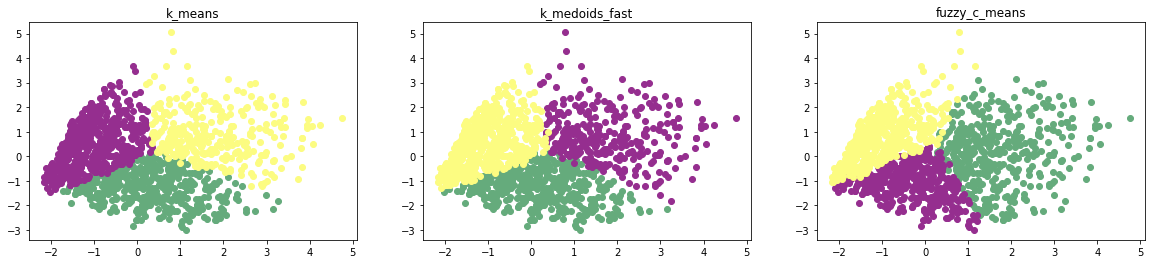

In [11]:
# 4. plot scatter
agg.plot_scatter_for_k(manually_selected_k, n_iter)

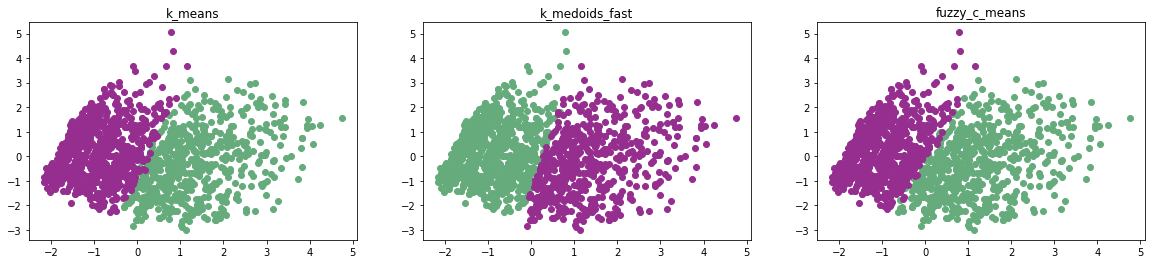

In [12]:
# 4. plot scatter 2.0
manually_selected_k_aux = {
    'k_means': 2,
    'k_medoids_fast': 2,
    'fuzzy_c_means': 2
}
agg.plot_scatter_for_k(manually_selected_k_aux, n_iter)

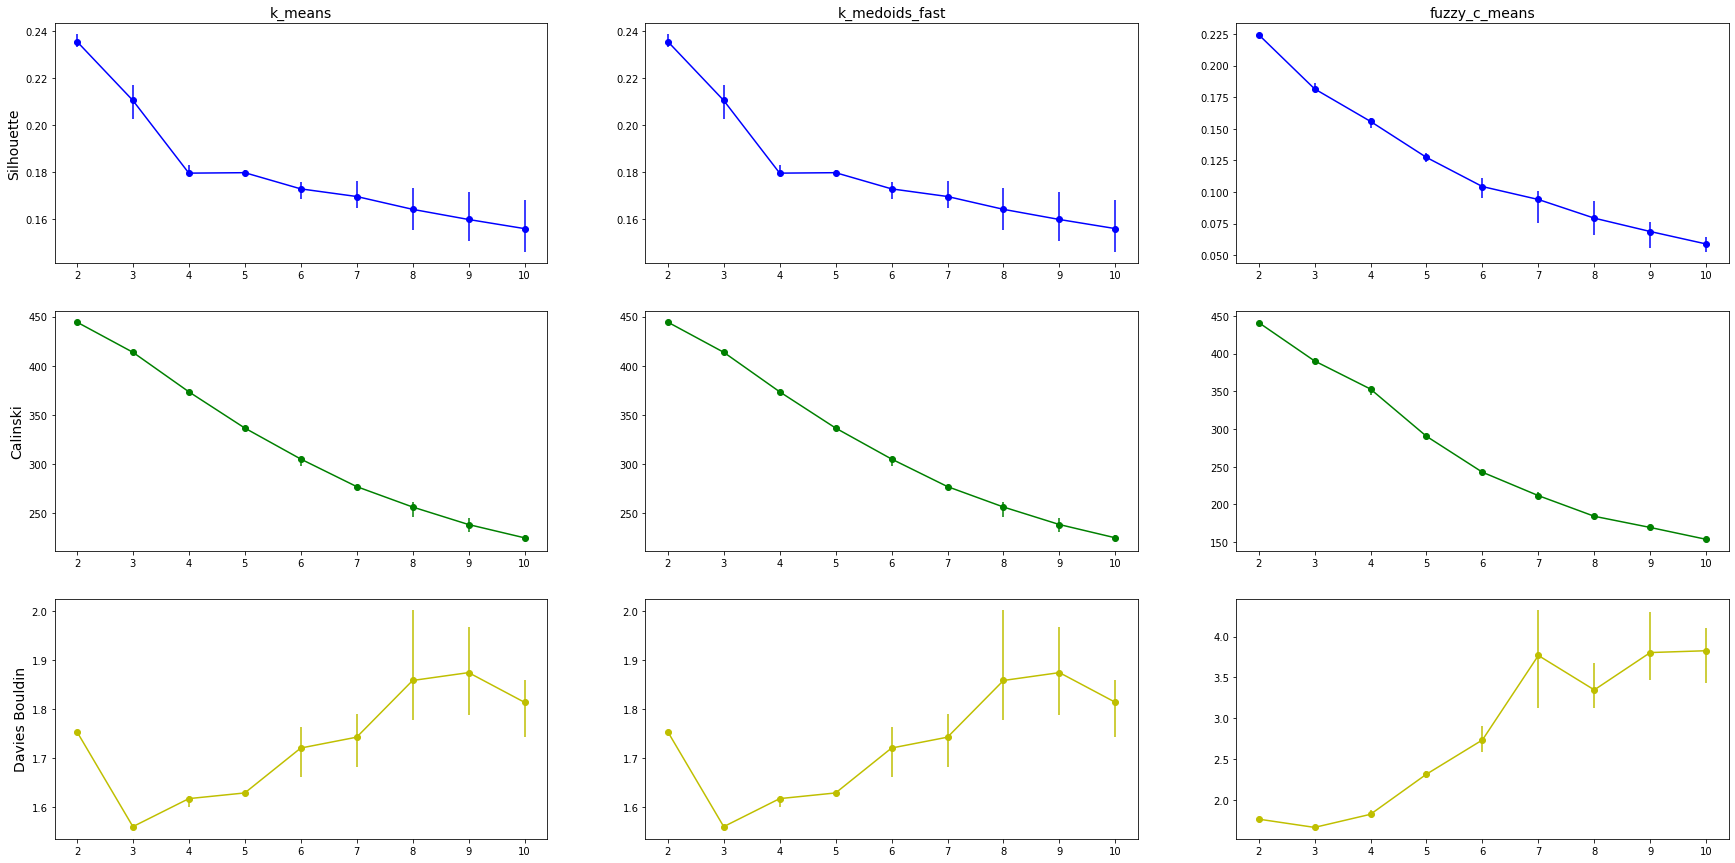

In [8]:
# 5. plot algorithms/iterations with error to choose k
agg.plot_metrics_with_error()

In [31]:
# 6. plot external validation metrics
agg.compute_confusion_matrix(manually_selected_k, data_y[class_column_name].to_numpy(), n_iter)
agg.plot_metrics_matching_sets()

Confusion matrix of algorithm: k_means
{'TP': 142992, 'FP': 245676, 'TN': 455363, 'FN': 240097}
Confusion matrix of algorithm: k_medoids_fast
{'TP': 141712, 'FP': 243809, 'TN': 457230, 'FN': 241377}
Confusion matrix of algorithm: fuzzy_c_means
{'TP': 136180, 'FP': 229698, 'TN': 471341, 'FN': 246909}


Algorithms  fuzzy_c_means   k_means  k_medoids_fast
metrics                                            
f1_score         0.363648  0.370562        0.368749
precision        0.372201  0.367903        0.367586
recall           0.355479  0.373261        0.369919


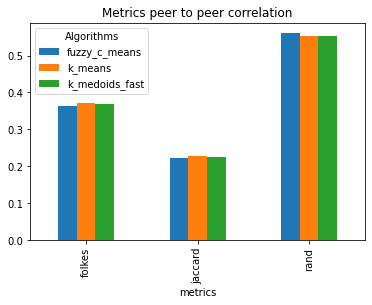

Algorithms  fuzzy_c_means   k_means  k_medoids_fast
metrics                                            
folkes           0.363744  0.370572        0.368751
jaccard          0.222231  0.227417        0.226053
rand             0.560378  0.551923        0.552464


In [10]:
# 7. plot internal validation metrics
agg.plot_metrics_p2p_correlation()

In [26]:
import numpy as np


np.random.seed(10)

for algo in list(agg._results):
    iter_choice = np.random.choice(n_iter)
    print(algo)
    print(agg._metrics['k_medoids_fast'][3][iter_choice])
    print('\n')

k_means
{'silhouette_score': 0.21051341819586636, 'calinski_harabasz_score': 413.4277392922436, 'davies_bouldin_score': 1.555759578161178}


k_medoids_fast
{'silhouette_score': 0.20852184148816819, 'calinski_harabasz_score': 413.65674670907663, 'davies_bouldin_score': 1.559871699645905}


fuzzy_c_means
{'silhouette_score': 0.20852184148816819, 'calinski_harabasz_score': 413.65674670907663, 'davies_bouldin_score': 1.559871699645905}


